# 1 Classification

In [216]:
import pandas as pd
import numpy as np

In [217]:
df = pd.read_csv('house-votes-84.csv', header=None, names = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious',
    'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education','superfund', 'crime', 'duty_free_exports', 'eaa_rsa'])

In [218]:
df = df.replace({'n': 0, 'y': 1, '?': np.nan}).dropna()

In [219]:
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


## kNN

In [220]:
from sklearn.neighbors import KNeighborsClassifier

In [221]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

- Fit

In [222]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X=X, y=y)

KNeighborsClassifier(n_neighbors=6)

- Predict

In [223]:
# Predict the labels for the training data X
y_pred = knn.predict(X)
y_pred[0:5]

array(['democrat', 'republican', 'democrat', 'democrat', 'democrat'],
      dtype=object)

In [224]:
# array.reshape(-1, 1) if your data has a single feature 
# or array.reshape(1, -1) if it contains a single sample
X_new = np.array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
        0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
        0.73799541]).reshape(1, -1)
# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
new_prediction

array(['democrat'], dtype=object)

## Data Split

In [225]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

In [226]:
# Load the digits dataset: digits
digits = datasets.load_digits()

In [227]:
# Print the keys and DESCR of the dataset
print(digits.keys())
# print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [228]:
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
# 'stratify' split the data proportionally according to 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.2, random_state=42, stratify=y)

- Fit

In [229]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

- Accuracy

In [230]:
# mean accuracy in classification 
knn.score(X_test, y_test)

0.9833333333333333

# 2 Regression

In [231]:
df = pd.read_csv('gm_2008_region.csv')

In [232]:
# Create arrays for features and target variable
y = df['life']
X = df['fertility']

In [233]:
# change it from pandas series to numpy array, then reshape
X = X.values.reshape(-1,1)
y_reshaped = y.values.reshape(-1,1)
X[0:5]

array([[2.73],
       [6.43],
       [2.24],
       [1.4 ],
       [1.96]])

## Linear Regression

In [234]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

In [235]:
boston = pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [236]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

In [237]:
# single feature
X_rooms = X[:,5]

In [238]:
X_rooms = X_rooms.reshape(-1, 1)
y = y.reshape(-1, 1)

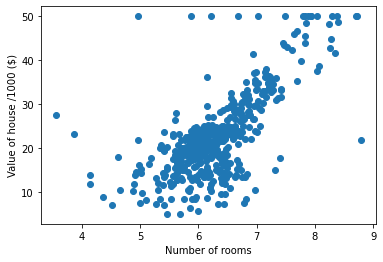

In [239]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

- Fit

In [240]:
reg = LinearRegression()
reg.fit(X_rooms, y)

LinearRegression()

- Predict

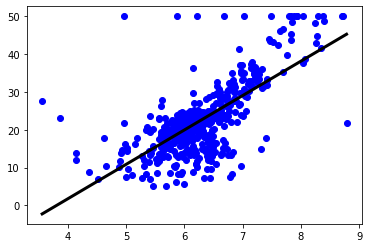

In [241]:
prediction_space = np.linspace(min(X_rooms),
                                    max(X_rooms)).reshape(-1, 1)
y_pred = reg.predict(prediction_space)

plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, y_pred, 
         color='black', linewidth=3)
plt.show()

In [242]:
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

- Fit

In [243]:
# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

LinearRegression()

- Predict

In [244]:
# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

- Evaluation

In [245]:
# R^2 as default in regression model
reg_all.score(X_test, y_test)

0.7112260057484965

In [246]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

21.51744423117697

## Cross_Validation

In [247]:
from sklearn.model_selection import cross_val_score

In [248]:
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)

In [249]:
cv_results

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

## Regularization: Lasso
When the sample size is not large enough. 

In [250]:
from sklearn.linear_model import Lasso

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size = 0.3, random_state=42)


- Fit

In [252]:
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, normalize=True)

- Predict

In [253]:
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.595022953532855

## Regularization: Ridge

In [254]:
from sklearn.linear_model import Ridge

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size = 0.3, random_state=42)

- Fit

In [256]:
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, normalize=True)

- Predict

In [257]:
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)
# r2_score(y_test, ridge_pred)

0.6996938275127318

# 3 Fine-tuning

## Metrics for classification

In [258]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [259]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [260]:
X = diabetes.drop('Outcome', axis=1).values
y = diabetes['Outcome'].values

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, random_state=42)

- Fit

In [262]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

- Predict

In [263]:
y_pred = knn.predict(X_test)

- Metrics

In [264]:
confusion_matrix(y_test, y_pred)

array([[176,  30],
       [ 56,  46]])

In [265]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



## ROC curve

In [266]:
from sklearn.linear_model import LogisticRegression

In [267]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/riliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [268]:
from sklearn.metrics import roc_curve

In [269]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

NameError: name 'y_pred_prob' is not defined

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## AUC

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [ ]:
roc_auc_score(y_test, y_pred_prob)

In [ ]:
cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

## Hyperparameter tuning with GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [ ]:
logreg = LogisticRegression()
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X, y)

In [ ]:
logreg_cv.best_params_

In [ ]:
logreg_cv.best_score_

## Hyperparameter tuning with RandomizedSearchCV

In [ ]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [ ]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X, y)

In [ ]:
tree_cv.best_params_

In [ ]:
tree_cv.best_score_

# 4 Preprocessing and Pipeline

## 

In [ ]:
df = pd.read_csv('gm_2008_region.csv')
df.head()

In [ ]:
df.boxplot('life', 'Region', rot=30)

## Dummy Variables

In [ ]:
df_region = pd.get_dummies(df)
df_region.head()

In [ ]:
pd.get_dummies(df, drop_first=True)

## Regression with categorical features

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [ ]:
ridge = Ridge(alpha=0.5, normalize=True)
ridge.fit(X, y)

In [ ]:
ridge_cv = cross_val_score(ridge, X, y, cv=5)
ridge_cv

## Missing data

In [ ]:
df[df == '?'] = np.nan

In [ ]:
df.isnull().sum()

In [ ]:
df = df.dropna()

## ML Pipeline

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('house-votes-84.csv', header=None, names = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious',
    'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education','superfund', 'crime', 'duty_free_exports', 'eaa_rsa'])

df = df.replace({'n': 0, 'y': 1, '?': np.nan}).dropna()

In [ ]:
# Create arrays for the features and the response variable
y = df['party']
X = df.drop('party', axis=1)

In [ ]:
# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('SVM', SVC())]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

## Centering and scaling

In [ ]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('white-wine.csv')
df.head()

In [ ]:
X = df.drop('quality', axis=1).values
y = df['quality'].values

In [ ]:
X_scaled = scale(X)

In [ ]:
np.mean(X)

In [ ]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
knn_scaled = pipeline.fit(X_train, y_train)

In [ ]:
knn_scaled.score(X_test, y_test)

## Pipiline for classification

In [271]:
from sklearn.model_selection import GridSearchCV
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]} 

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        94
           1       0.78      0.52      0.62        60

    accuracy                           0.75       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.75      0.74       154

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}


## Pipeline for regression

In [275]:
from sklearn.linear_model import ElasticNet
# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


/Users/riliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.96781169751791, tolerance: 0.00843668478260869
  model = cd_fast.enet_coordinate_descent(
/Users/riliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.960591629796134, tolerance: 0.008285869565217393
  model = cd_fast.enet_coordinate_descent(
/Users/riliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.89007613109569, tolerance: 0.00867391304347826
  model = cd_fast.enet_coordinate_descent(
/Users/riliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/li

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.2254967033649129


/Users/riliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.32882111950669, tolerance: 0.010609565217391311
  model = cd_fast.enet_coordinate_descent(
